## a few pointers for spliting training and testing dataset
1. to retain the same data order can setup a seed but issue is updating dataset
2. hash values of the identification field. 
 

In [47]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [21]:
import hashlib
import numpy as np
import pandas as pd

def test_set_check(identifer, test_ratio, hash = hashlib.md5):
    return hash(np.int64(identifer)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [49]:
df_housing = pd.DataFrame(housing['data'])
df_housing.columns = housing['feature_names']
df_housing["median_house_value"] = housing['target']

In [25]:
housing_with_id = df_housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print(f"{len(train_set)}: {len(test_set)}")

16362: 4278


In [50]:
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Sampling in sklearn

In [29]:
# alternatively use train and test set from sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

<AxesSubplot:ylabel='Frequency'>

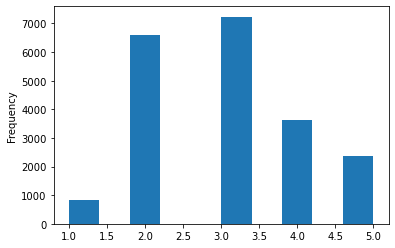

In [32]:
df_housing.income_cat.plot.hist()

In [38]:
# stratified splis based on income category
df_housing['income_cat'] = np.ceil(df_housing["MedInc"]/1.5)
df_housing['income_cat'].where(df_housing['income_cat']<5, 5, inplace=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_housing, df_housing['income_cat']):
    strat_train_set = df_housing.loc[train_index]
    strat_test_set = df_housing.loc[test_index]

for set_ in (strat_test_set, strat_train_set):
    set_.drop('income_cat', axis=1, inplace=True)

[ 5241 10970 20351 ...  4019 12107  2398]


## Visualisation

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

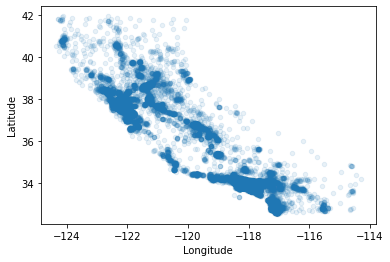

In [42]:
df_housing.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude', alpha=0.1)

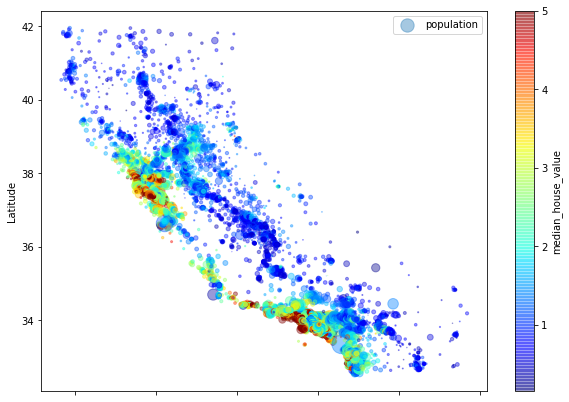

In [52]:
from matplotlib import pyplot as plt

# a bit more complicated data
df_housing.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude', alpha=0.4,
                s = df_housing['Population']/100, label = 'population', figsize=(10,7),
                c = "median_house_value", cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

## correlation matrix

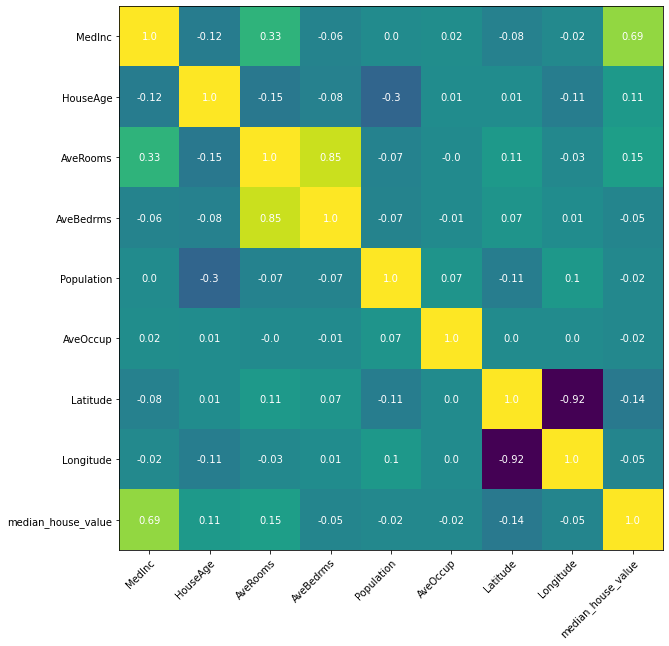

In [70]:
corr = df_housing.corr()

fig, ax = plt.subplots(figsize=(20, 10))

# We want to show all ticks...
ax.set_xticks(np.arange(len(df_housing.columns)))
ax.set_yticks(np.arange(len(df_housing.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(df_housing.columns)
ax.set_yticklabels(df_housing.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.round(corr.iloc[i, j], 2),
                       ha="center", va="center", color="w")

ax.imshow(df_housing.corr())


## scatter matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='MedInc', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='MedInc'>,
        <AxesSubplot:xlabel='MedInc', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='MedInc'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='AveRooms'>,
        <AxesSubplot:xlabel='MedInc', ylabel='AveRooms'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='AveRooms'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='AveRooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='MedInc', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Hous

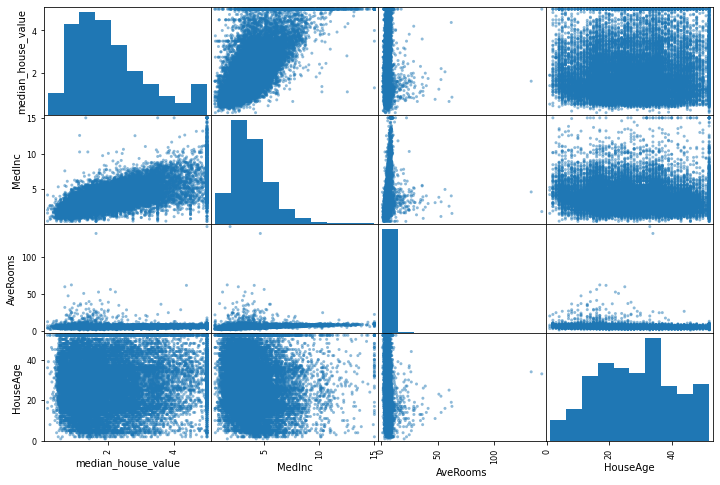

In [73]:
#%%
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "MedInc", "AveRooms", "HouseAge"]
scatter_matrix(df_housing[attributes], figsize=(12,8))